In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('./seeds_dataset.csv', sep=",")

In [3]:
data.shape

(210, 9)

In [4]:
data.dtypes

ID                        int64
area                    float64
perimeter               float64
compactness             float64
lengthOfKernel          float64
widthOfKernel           float64
asymmetryCoefficient    float64
lengthOfKernelGroove    float64
seedType                  int64
dtype: object

In [5]:
data.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [6]:
data.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
data["seedType"].unique()

array([1, 2, 3], dtype=int64)

In [8]:
# Удаление колонки "ID"
data.drop(columns=['ID'], inplace=True)

# Перемещение колонки "seed_type" в начало датафрейма
seed_type_column = data['seedType']  # Сохраняем колонку "seed_type"
data.drop(columns=['seedType'], inplace=True)  # Удаляем колонку "seed_type"
data.insert(0, 'seedType', seed_type_column)  # Вставляем "seed_type" в начало датафрейма

data.head()

,seedType,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


<Axes: >

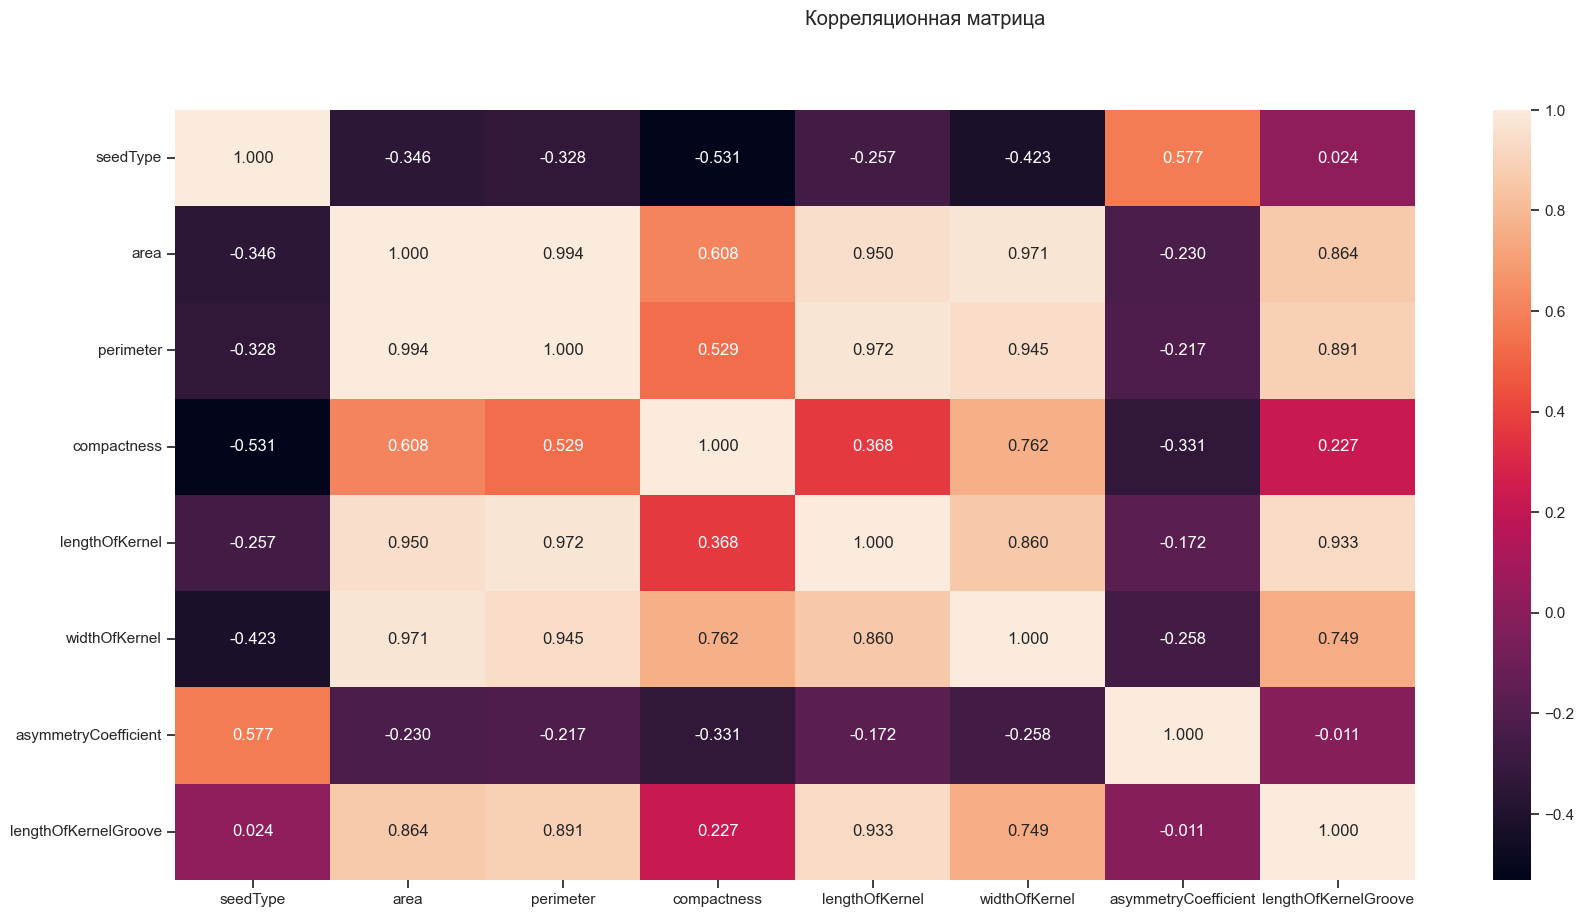

In [9]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

In [10]:
data_x = data.copy()
data_x = data_x.drop(columns="seedType")
data_x

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [11]:
data_y = data["seedType"]
data_y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: seedType, Length: 210, dtype: int64

In [12]:
# Разделение выборки на обучающую и тестовую
data_X_test, data_X_train, data_Y_test, data_Y_train = train_test_split(data_x, data_y, test_size=0.2, random_state=2024)

In [13]:
# Обучение модели для произвольного гиперпараметра K=30

cl1_1 = KNeighborsClassifier(n_neighbors=30)
#cl1_1 = KNeighborsRegressor(n_neighbors=10)

cl1_1.fit(data_X_train, data_Y_train)
target1_0 = cl1_1.predict(data_X_train)
target1_1 = cl1_1.predict(data_X_test)

#mean_squared_error(data_Y_train, target1_0), mean_squared_error(data_Y_test, target1_1)

accuracy_score(data_Y_train, target1_0), accuracy_score(data_Y_test, target1_1)

(0.6190476190476191, 0.5654761904761905)

In [14]:
# Кросс-валидация

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), data_x, data_y, cv=5)
scores, np.mean(scores)

(array([0.95238095, 0.95238095, 0.88095238, 0.92857143, 0.71428571]),
 0.8857142857142858)

In [15]:
# использование метрики f1
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data_x, data_y, cv=5,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.95235054, 0.95213675, 0.87726575, 0.9284802 , 0.71893408]),
 0.8858334654275394)

In [16]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [17]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data_x, data_y, scoring=scoring, 
                        cv=5, return_train_score=True)
scores

{'fit_time': array([0.00325394, 0.00904322, 0.01003623, 0.00200629, 0.        ]),
 'score_time': array([0.0148344 , 0.00727391, 0.00974202, 0.00797939, 0.00998569]),
 'test_precision': array([0.9122807 , 0.95833333, 0.90674603, 0.95238095, 0.81538462]),
 'train_precision': array([0.95384615, 0.95384615, 0.9726776 , 0.96296296, 0.98305085]),
 'test_recall': array([0.88095238, 0.95238095, 0.9047619 , 0.95238095, 0.76190476]),
 'train_recall': array([0.94642857, 0.94642857, 0.9702381 , 0.95833333, 0.98214286]),
 'test_f1': array([0.88385392, 0.95213675, 0.9026862 , 0.95238095, 0.76776862]),
 'train_f1': array([0.94728461, 0.94728461, 0.97052007, 0.95887217, 0.98224074])}

In [18]:
# Grid Search

n_range = np.array(range(5,35,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}]

In [19]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_macro')
clf_gs.fit(data_X_train, data_Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}],
             scoring='f1_macro')

In [20]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00341358, 0.00232453, 0.00263052, 0.00116687, 0.        ,
        0.00072193]),
 'std_fit_time': array([0.00106233, 0.00048438, 0.00376811, 0.00233374, 0.        ,
        0.00144386]),
 'mean_score_time': array([0.00504379, 0.00508699, 0.00282116, 0.01025057, 0.00958285,
        0.00965447]),
 'std_score_time': array([0.00173986, 0.0011346 , 0.00395811, 0.00306024, 0.00118935,
        0.00264593]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30}],
 'split0_test_score': array([0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.16666667,
        0.16666667]),
 'split1_test_score': array([1.        , 1.        , 1.        , 1.        , 0.16666667,
        0.16666667]),
 'split2_test_score'

In [21]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [22]:
# Лучшее значение метрики
clf_gs.best_score_

0.9238095238095237

In [23]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

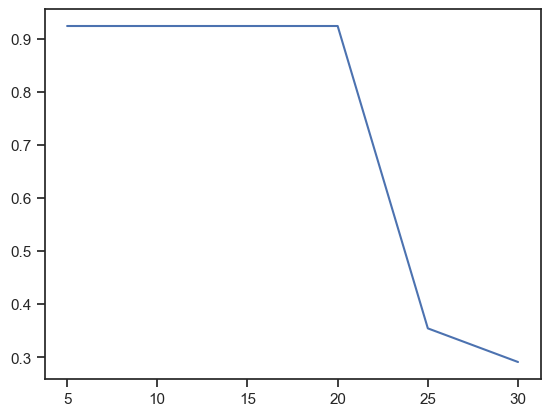

In [24]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [25]:
# Randomized Search

clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_macro')
clf_rs.fit(data_X_train, data_Y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30])}],
                   scoring='f1_macro')

In [26]:
clf_rs.best_score_, clf_rs.best_params_

(0.9238095238095237, {'n_neighbors': 5})

In [27]:
clf_gs.best_score_, clf_gs.best_params_

(0.9238095238095237, {'n_neighbors': 5})

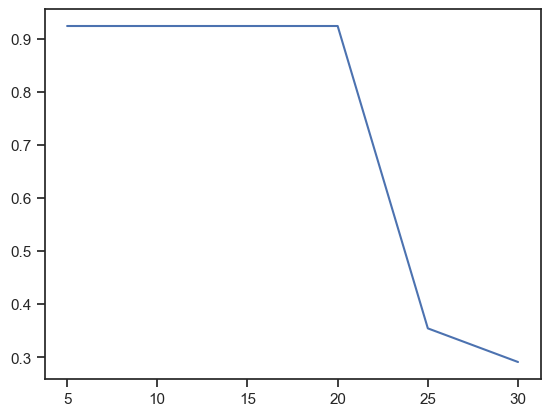

In [28]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

In [29]:
clf_gs.best_estimator_.fit(data_X_train, data_Y_train)
target2_0 = clf_gs.best_estimator_.predict(data_X_train)
target2_1 = clf_gs.best_estimator_.predict(data_X_test)

In [30]:
# Новое качество модели
accuracy_score(data_Y_train, target2_0), accuracy_score(data_Y_test, target2_1)

(0.9285714285714286, 0.8988095238095238)

In [31]:
# Качество модели до подбора гиперпараметров
accuracy_score(data_Y_train, target1_0), accuracy_score(data_Y_test, target1_1)

(0.6190476190476191, 0.5654761904761905)